## Bankruptcy Prediction through Ensemble Learning Algorithms

In which we attempt to qualitatively analyze the bankruptcy dataset to produce a prediction.

In [1]:
from scipy.io import arff

Load the bankruptcy dataset spanning five years worth of data.

In [2]:
first_year = arff.loadarff('./dataset/1year.arff')
second_year = arff.loadarff('./dataset/2year.arff')
third_year = arff.loadarff('./dataset/3year.arff')
fourth_year = arff.loadarff('./dataset/4year.arff')
fifth_year = arff.loadarff('./dataset/5year.arff')

In [3]:
import pandas as pd

In [4]:
df_first_year = pd.DataFrame(first_year[0])
df_second_year = pd.DataFrame(second_year[0])
df_third_year = pd.DataFrame(third_year[0])
df_fourth_year = pd.DataFrame(fourth_year[0])
df_fifth_year = pd.DataFrame(fifth_year[0])

Show the total number of instances of the raw dataset.

In [5]:
int(df_first_year.shape[0]) + \
int(df_second_year.shape[0]) + \
int(df_third_year.shape[0]) + \
int(df_fourth_year.shape[0]) + \
int(df_fifth_year.shape[0])

43405

Merge the dataframes into one.

In [6]:
df = pd.concat([df_first_year, df_second_year, df_third_year, df_fourth_year, df_fifth_year])

Get the correlation on raw dataset.

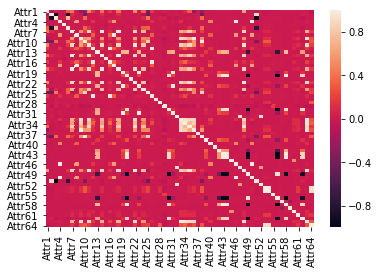

In [8]:
import seaborn as sns
sns.heatmap(df.loc[:, df.columns != 'class'].corr())

Remove instances of dataframe where there is `NaN` or `inf`, those are unknown data that introduces unpredictable consequences for the analysis of our data.

In [9]:
df = df.dropna(axis=0, how='any')

Get the correlation once again on the cleaned dataset.

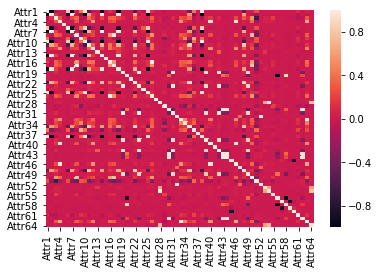

In [10]:
sns.heatmap(df.loc[:, df.columns != 'class'].corr())

Isolate the class labels

In [11]:
import numpy as np
labels = np.array(df['class'], np.int)

In [12]:
int(labels[labels == 1].shape[0]) / int(labels.shape[0]) * 100.00

2.1635698903190264

In [13]:
int(labels[labels == 0].shape[0]) / int(labels.shape[0]) * 100.00

97.83643010968098

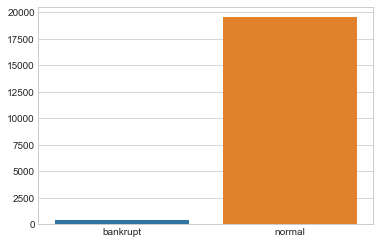

In [14]:
sns.set_style('whitegrid')
label_freq_dist = pd.DataFrame.from_dict({'normal': [int(labels[labels == 0].shape[0])],
                                          'bankrupt': [int(labels[labels == 1].shape[0])]})
sns.barplot(data=label_freq_dist)

Isolate the dataset features.

In [15]:
features = np.array(df.loc[:, df.columns != 'class'])